In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns

In [2]:
colleges = pd.read_csv("C:/Users/divya/Colleges.csv", header=0)
city = pd.read_csv("C:/Users/divya/cities.csv", header=0)
df = pd.read_csv("C:/Users/divya/ML case Study.csv", header=0)

In [3]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [4]:
city.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [5]:
colleges.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [6]:
Tier1 = colleges["Tier 1"].tolist()
Tier2 = colleges["Tier 2"].tolist()
Tier3 = colleges["Tier 3"].tolist()

In [7]:
for item in df.College:
    if item in Tier1:
        df["College"].replace(item,1,inplace=True)
    elif item in Tier2:
        df["College"].replace(item,2,inplace=True)
    elif item in Tier3:
        df["College"].replace(item,3,inplace=True)

In [8]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,Asansol,Manager,55523.0,3,66,19,71406.58
1,2,Ajmer,Executive,57081.0,1,84,18,68005.87
2,3,Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,3,Ajmer,Executive,49010.0,2,81,33,82092.39
4,1,Durgapur,Executive,57879.0,4,74,32,73878.10


In [9]:
non_mc = city["non-metro cities"].tolist()
mc = city["Metrio City"].tolist()

In [10]:
for item in df.City:
    if item in non_mc:
        df["City"].replace(item,0,inplace=True)
    elif item in mc:
        df["City"].replace(item,1,inplace=True)

In [11]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523.0,3,66,19,71406.58
1,2,0,Executive,57081.0,1,84,18,68005.87
2,3,0,Executive,60347.0,2,52,28,76764.02
3,3,0,Executive,49010.0,2,81,33,82092.39
4,1,0,Executive,57879.0,4,74,32,73878.10


In [12]:
df = pd.get_dummies(df, columns = ["Role"],drop_first = True)

In [13]:
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,0,55523.0,3,66,19,71406.58,1
1,2,0,57081.0,1,84,18,68005.87,0
2,3,0,60347.0,2,52,28,76764.02,0
3,3,0,49010.0,2,81,33,82092.39,0
4,1,0,57879.0,4,74,32,73878.10,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Previous CTC         1589 non-null   float64
 3   Previous job change  1589 non-null   int64  
 4   Graduation Marks     1589 non-null   int64  
 5   EXP (Month)          1589 non-null   int64  
 6   CTC                  1589 non-null   float64
 7   Role_Manager         1589 non-null   uint8  
dtypes: float64(2), int64(5), uint8(1)
memory usage: 88.6 KB


In [15]:
df.describe()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,1.975456,0.514160,55518.453744,2.528634,59.855255,39.044682,75353.278798,0.206419
std,0.838330,0.499957,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.404862
min,1.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000
25%,1.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000,0.000000
50%,2.000000,1.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000,0.000000
75%,3.000000,1.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000,0.000000
max,3.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000


<Axes: >

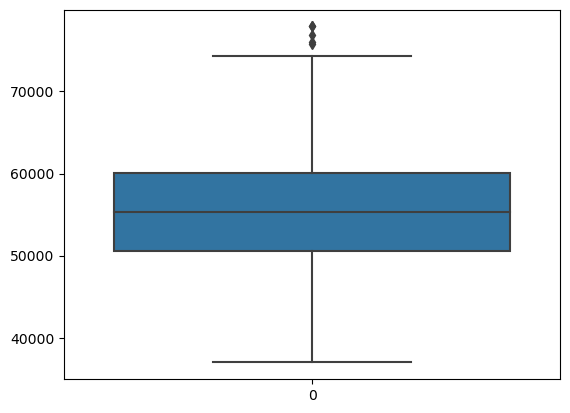

In [16]:
sns.boxplot(df["Previous CTC"])

<Axes: >

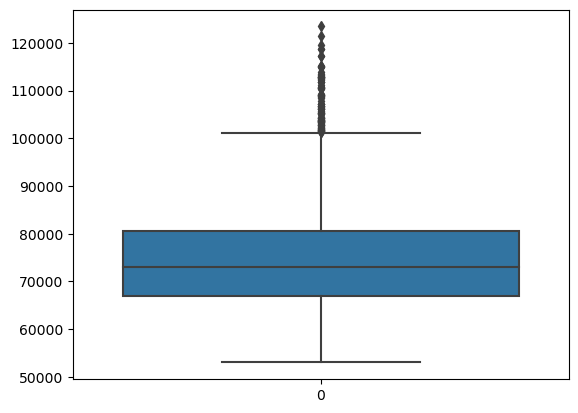

In [17]:
sns.boxplot(df["CTC"])

In [18]:
np.percentile(df["Previous CTC"], [99])[0]

71506.92

In [19]:
ul_1 = np.percentile(df["Previous CTC"], [99])[0]

In [20]:
df[(df["Previous CTC"]>ul_1)]

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
116,3,1,77911.0,1,50,58,87831.62,0
292,3,0,74198.0,1,57,25,99644.51,1
543,1,1,73856.0,1,75,54,121362.73,1
572,1,1,71543.0,4,82,30,61366.78,0
701,2,0,71549.0,4,47,50,83116.21,0
847,1,1,71756.0,4,67,23,72141.43,0
860,1,1,75785.0,4,63,37,110338.25,1
941,3,1,72319.0,1,51,50,63538.43,0
1024,1,1,72661.0,3,74,47,70238.70,0
1047,1,0,73214.0,4,57,22,100119.53,1


In [21]:
df["Previous CTC"][(df["Previous CTC"]>3*ul_1)] = 3*ul_1

C:\Users\divya\AppData\Local\Temp\ipykernel_21140\577607769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Previous CTC"][(df["Previous CTC"]>3*ul_1)] = 3*ul_1


In [22]:
np.percentile(df.CTC, [99])[0]

112826.26

In [23]:
ul_2 = np.percentile(df.CTC, [99])[0]

In [24]:
df[(df.CTC>ul_2)]

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
34,1,0,60894.0,4,80,28,118651.89,1
185,2,0,70258.0,4,38,36,115126.75,1
254,2,1,51912.0,2,66,50,113141.14,1
328,3,0,62264.0,2,52,64,114996.23,1
543,1,1,73856.0,1,75,54,121362.73,1
577,3,1,59101.0,3,56,31,113843.16,1
668,1,1,60476.0,1,85,62,113212.07,1
883,3,1,64930.0,1,66,51,114939.65,1
1146,1,1,61709.0,4,39,60,117207.24,1
1230,2,0,60298.0,1,47,52,123416.99,1


In [25]:
df.CTC[(df.CTC >3*ul_2)] = 3*ul_2

C:\Users\divya\AppData\Local\Temp\ipykernel_21140\4187248755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.CTC[(df.CTC >3*ul_2)] = 3*ul_2


In [26]:
df.describe()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,1.975456,0.514160,55518.453744,2.528634,59.855255,39.044682,75353.278798,0.206419
std,0.838330,0.499957,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.404862
min,1.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000
25%,1.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000,0.000000
50%,2.000000,1.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000,0.000000
75%,3.000000,1.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000,0.000000
max,3.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000


In [27]:
x = df.loc[:, df.columns != "CTC"]
y = df["CTC"]

In [28]:
from sklearn import preprocessing
import statsmodels.api as sn
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [30]:
scaler=preprocessing.StandardScaler().fit(x_train)

In [31]:
x_train_s=scaler.transform(x_train)

In [32]:
x_test_s=scaler.transform(x_test)

## Linear Regression

In [33]:
l_reg = LinearRegression()

In [34]:
x_cons=sn.add_constant(x_train)
lm=sn.OLS(y_train, x_cons).fit()

In [35]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     206.0
Date:                Thu, 07 Sep 2023   Prob (F-statistic):          7.92e-204
Time:                        02:37:38   Log-Likelihood:                -13328.
No. Observations:                1271   AIC:                         2.667e+04
Df Residuals:                    1263   BIC:                         2.671e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.699e+04   2458.462     15.046      0.000    3.22e+04    4.18e+04
College              -396.7996    291.573     -1.361      0.174    -968.821     175.222
City                  932.4008    489.312      1.906      0.057     -27.553    1892.354
Previous CTC            0.4289      0.037     11.615      0.000       0.356       0.501
Previous job change    98.2300    218.535      0.449      0.653    -330.502     526.962
Graduation Marks        9.9451     16.391      0.607      0.544     -22.211      42.101
EXP (Month)           257.5920     17.472     14.743      0.000     223.315     291.869
Role_Manager         1.924e+04    602.235     31.950      0.000    1.81e+04    2.04e+04
==============================================================================
Omnibus:                       44.386   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.913
Skew:                           0.429   Prob(JB):                     1.45e-11
Kurtosis:                       3.455   Cond. No.                     5.62e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
l_reg.fit(x_train_s, y_train)

LinearRegression()

In [37]:
r2_score(y_test, l_reg.predict(x_test_s))

0.535598989479013

## Ridge Regression

In [38]:
from sklearn.linear_model import Ridge

In [39]:
lm_r=Ridge(alpha=0.5)
lm_r.fit(x_train_s,y_train)

Ridge(alpha=0.5)

In [40]:
r2_score(y_test,lm_r.predict(x_test_s))

0.5355848845406525

In [41]:
from sklearn.model_selection import validation_curve

In [42]:
para_range=np.logspace(-2,4,100)

In [43]:
train_scores,test_scores=validation_curve(Ridge(), x_train_s, y_train, param_name="alpha", param_range=para_range, scoring='r2')

In [44]:
train_mean=np.mean(train_scores, axis=1)

In [45]:
test_mean=np.mean(test_scores, axis=1)

In [46]:
np.where(test_mean==max(test_mean))

(array([44], dtype=int64),)

In [47]:
lm_r_best=Ridge(alpha=para_range[26])

In [48]:
lm_r_best.fit(x_train_s, y_train)

Ridge(alpha=0.37649358067924676)

In [49]:
r2_score(y_test, lm_r_best.predict(x_test_s))

0.5355883813101807

## Decision Tree

In [50]:
from sklearn import tree
regtree = tree.DecisionTreeRegressor(max_depth = 4)

In [51]:
regtree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4)

In [52]:
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
mean_squared_error(y_test, regtree.predict(x_test))

58875901.69009936

In [54]:
r2_score(y_test, regtree.predict(x_test))

0.603220439065417

In [55]:
from IPython.display import Image
import pydotplus

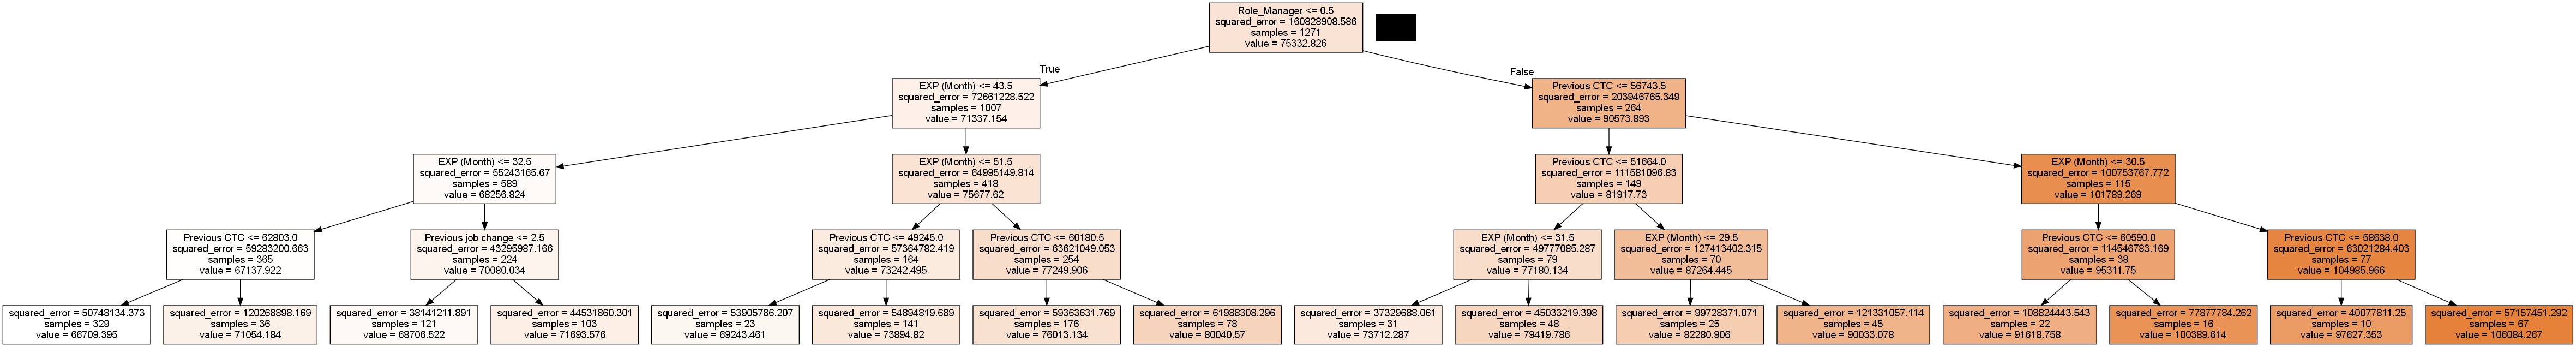

In [56]:
dot_data = tree.export_graphviz(regtree, out_file = None, feature_names = x_train.columns, filled = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [57]:
from sklearn.model_selection import GridSearchCV

## K-Nearest Neighbors

In [58]:
params = {'n_neighbors':[20,25,30,35]}
from sklearn.neighbors import KNeighborsRegressor

In [59]:
grid_search_cv = GridSearchCV(KNeighborsRegressor(), params)

In [60]:
grid_search_cv.fit(x_train_s, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [20, 25, 30, 35]})

In [61]:
grid_search_cv.best_params_

{'n_neighbors': 20}

In [62]:
optimised_KNN = grid_search_cv.best_estimator_
r2_score(y_test,optimised_KNN.predict(x_test_s))

0.5636887480749484

## Bagging

In [63]:
from sklearn.ensemble import BaggingRegressor

In [64]:
bag_reg = BaggingRegressor(estimator=regtree, n_estimators=1000,
                           bootstrap=True, n_jobs=-1,
                           random_state=42)

In [65]:
bag_reg.fit(x_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                 n_estimators=1000, n_jobs=-1, random_state=42)

In [66]:
r2_score(y_test, bag_reg.predict(x_test))

0.6179332002287754

## Random Forest

In [67]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
rf_reg = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)

In [69]:
rf_reg.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)

In [70]:
r2_score(y_test, rf_reg.predict(x_test))

0.6607840939246611

In [71]:
params_grid = {"max_features" : [4,5,7,8,9,10],
              "min_samples_split" : [2,3,10]}

In [72]:
grid_search = GridSearchCV(rf_reg, params_grid,
                          n_jobs=-1, cv=5, scoring="r2")

In [73]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=1000, n_jobs=-1,
                                             random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='r2')

In [74]:
cvrf_reg = grid_search.best_estimator_
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=1000, n_jobs=-1,
                      random_state=42)

In [75]:
r2_score(y_test, cvrf_reg.predict(x_test))

0.6618523327295341

## Gradient Boosting

In [76]:
from sklearn.ensemble import GradientBoostingRegressor

In [77]:
gbc_clf = GradientBoostingRegressor(learning_rate=0.3, n_estimators=1000, max_depth=1, random_state=42)
gbc_clf.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.3, max_depth=1, n_estimators=1000,
                          random_state=42)

In [78]:
r2_score(y_test, gbc_clf.predict(x_test))

0.5317694514606628

## Ada Boost

In [79]:
from sklearn.ensemble import AdaBoostRegressor

In [80]:
ada_reg = AdaBoostRegressor(learning_rate=0.06, n_estimators=1000, random_state=42)
ada_reg.fit(x_train, y_train)

AdaBoostRegressor(learning_rate=0.06, n_estimators=1000, random_state=42)

In [81]:
r2_score(y_test, ada_reg.predict(x_test))

0.6001744066868016

## XG Boost

In [82]:
import xgboost as xgb

In [83]:
xgb_reg = xgb.XGBRegressor(n_estimators=500, learning_rate= 0.01, random_state=42)

In [84]:
param_test1 = {
    "max_depth": range(2,10,2),
    "gamma": [0.1,0.2,0.3],
    "subsample": [0.8,0.9],
    "colsample_bytree": [0.8,0.9],
    "reg_alpha": [1e-2,0.1,1]
}

In [85]:
grid_search = GridSearchCV(xgb_reg, param_test1,
                          n_jobs=-1, cv=5, scoring="r2")

In [86]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.01, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=500,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.3], 'max_depth': range(2, 10, 2),
                         'reg_alpha': [0.01, 0.1, 1], 'subsample': [0.8, 0.9]},
             scoring='r2')

In [87]:
cvxg_reg=grid_search.best_estimator_

In [88]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.1,
 'max_depth': 8,
 'reg_alpha': 1,
 'subsample': 0.8}

In [89]:
r2_score(y_test, cvxg_reg.predict(x_test))

0.6519931126857226

# 1.Your views about the problem statement?

# 2.What will be your approach to solving this task?

# 3.What were the available ML model options you had to perform this task?

# 4.Which model’s performance is best and what could be the possible reason for that?

# 5. What steps can you take to improve this selected model’s performance even further?